# Sunil Ale Final Project on Machine Learning

In [144]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib


In [145]:
np.set_printoptions(precision=2, suppress=True) #for printing floating point numbers upto  precision 2

# Load real estate data from CSV

In [146]:
df = pd.read_csv('BlackFriday 2.csv')

In [147]:
df.shape

(537577, 12)

# Columns of the dataset

In [148]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Display the first 5 rows to see example observations.

In [149]:
pd.set_option('display.max_columns', 20) ## display max 20 columns
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Some feaures are numeric and some are categorical
# Filtering the categorical features:

In [150]:
df.dtypes[df.dtypes=='object']

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

# Distributions of numeric features

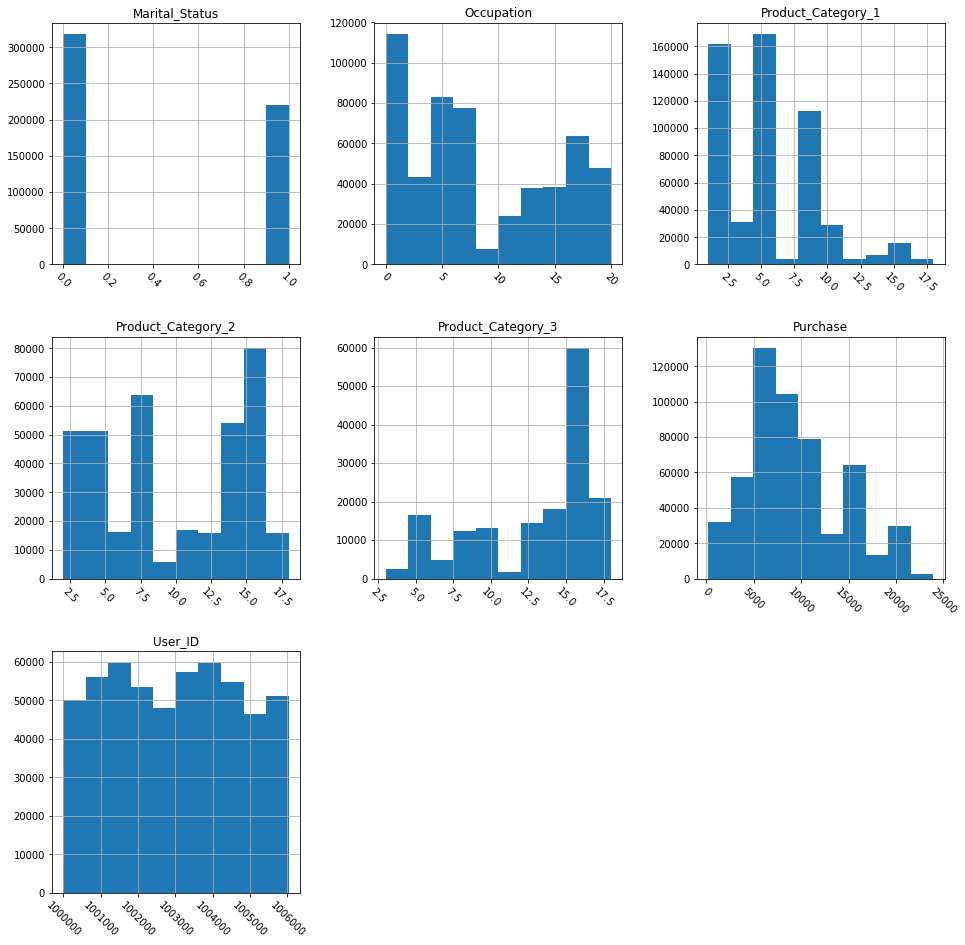

In [151]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

# Observations: We can make out quite a few observations:

The items in Category 1 were sold the most in
the numbers of 2 and 5. Only around 2,000 costumers bought
around 7 items belonging to Category 1.

Consider Product_Category_1, 2, 3:
The items belonging to Product_Category_1 is the most
popular category.

Consider Purchase:
The highest number (around 113,000) of people made
purchases of \\$5000 to $7000 while only about 
2000 people bought around \\$23,000 worth of items from
the store.

Consider User_ID:
On average, 50,000 Users were active shown by the
number of their User_IDs.

# Display summary statistics for the numerical features.

In [152]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


### Obeservation:
On average, a person bought $9333.86 worth of items.

# Distributions of categorical features

In [153]:
# Display summary statistics for categorical features.

In [154]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


### Observation:
- The most popular product was P00265242 with 1858 sales.
- 189,192 of the coustumers had been living in the same for 1 year.
- 214, 690 people of costumers were 26 to 35 years old.
- Almost 80% of the costumers were male. 405380 out of 537577 costumers were male.

# Bar plots for categorical Features
Plot bar plot for the 'Age' feature.

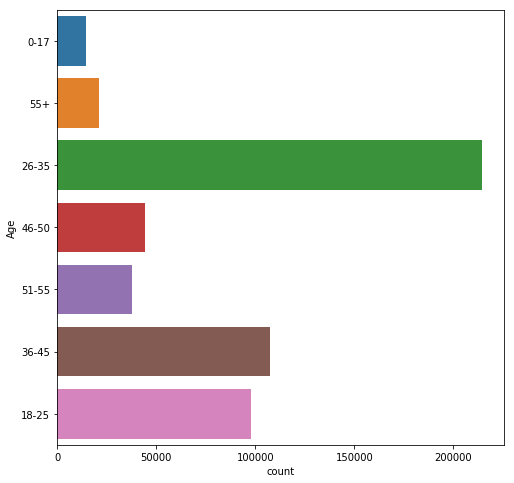

In [155]:
plt.figure(figsize=(8,8))
sns.countplot(y='Age', data=df)

# Similarly Plot bar plot for the 'City_Category' feature.

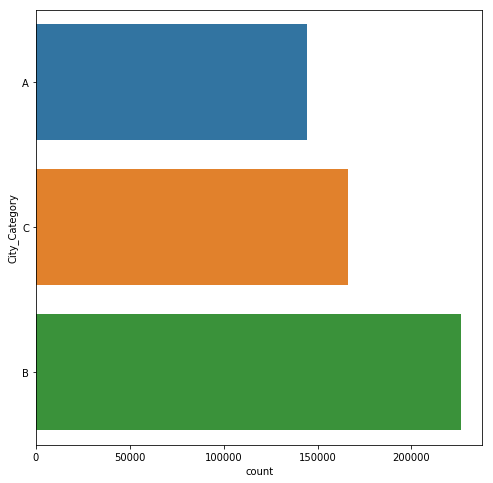

In [156]:
plt.figure(figsize=(8,8))
sns.countplot(y='City_Category', data=df)

# Segmentations
Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

Segmenting the target variable by key categorical features.

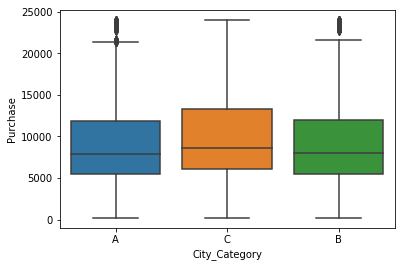

In [157]:
sns.boxplot(y='Purchase', x='City_Category', data=df)

### Observations
In this case there are clearly some outliers in City A and B.

In [158]:
df[df['City_Category']=='B'].sort_values(['Purchase'], ascending = False).head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
503697,1005596,P00117642,M,36-45,12,B,1,0,10,16.0,NaN,23960
292083,1003045,P00052842,M,46-50,1,B,2,1,10,15.0,NaN,23960
437804,1001387,P00086242,F,51-55,13,B,1,1,10,NaN,NaN,23959
416883,1004117,P00161842,M,18-25,4,B,4+,0,10,13.0,16.0,23958
449656,1003301,P00086242,F,26-35,2,B,3,0,10,NaN,NaN,23955


### Observation: 
On average, for all categories of cities, the same amount of purchases, which is of around \\$7000, were made on average. However,
75th quartile of purchase made in City categoried C was slightly higher than that of the others.

In [159]:
df.groupby('City_Category').mean()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
City_Category,,,,,,,
A,1.002901e+06,7.857306,0.381988,5.437036,9.945026,12.682530,8958.011014
B,1.003033e+06,7.973244,0.407430,5.300420,9.825763,12.674811,9198.657848
C,1.003015e+06,8.427538,0.433955,5.165964,9.779649,12.654322,9844.441855


### Observations :

City of category C makes the most amount of sales per
person which is worth \\$9844.44 on average. It around \\$600
more than that of City Category B.

However, City Category A is making more sales per person
for all categories of the products.


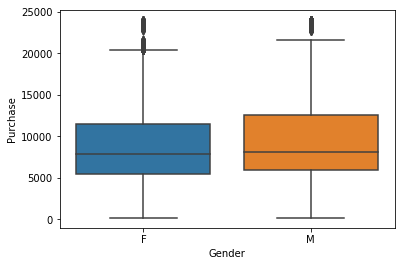

In [160]:
sns.boxplot(y='Purchase', x='Gender', data=df)

##### Observation

There are clearly some outliers in both Genders. Both genders have made on average around \\$8000 worth of purchases.

# Segment by Gender and display the means and standard deviations within each class

In [161]:
df.groupby('Gender').agg([np.mean, np.std])

User_ID              Occupation           Marital_Status  \
                mean          std       mean       std           mean   
Gender                                                                  
F       1.003088e+06  1774.236455   6.742672  6.242116       0.417733   
M       1.002961e+06  1693.251916   8.519705  6.554518       0.405883   

                 Product_Category_1           Product_Category_2            \
             std               mean       std               mean       std   
Gender                                                                       
F       0.493188           5.595445  3.476495          10.007969  4.872295   
M       0.491063           5.197748  3.830816           9.789072  5.153046   

       Product_Category_3               Purchase               
                     mean       std         mean          std  
Gender                                                         
F               12.452318  4.126782  8809.761349  4721.440055  
M               12.732924  4.121502  9504.771713  5051.057256

# Correlations
Finally, let's take a look at the relationships between numeric features and other numeric features.
Correlation is a value between -1 and 1 that represents how closely values for two separate features.
Positive correlation means that as one feature increases, the other increases.
Negative correlation means that as one feature increases, the other decreases.
Correlations near -1 or 1 indicate a strong relationship.
Those closer to 0 indicate a weak relationship.
0 indicates no relationship.

In [163]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


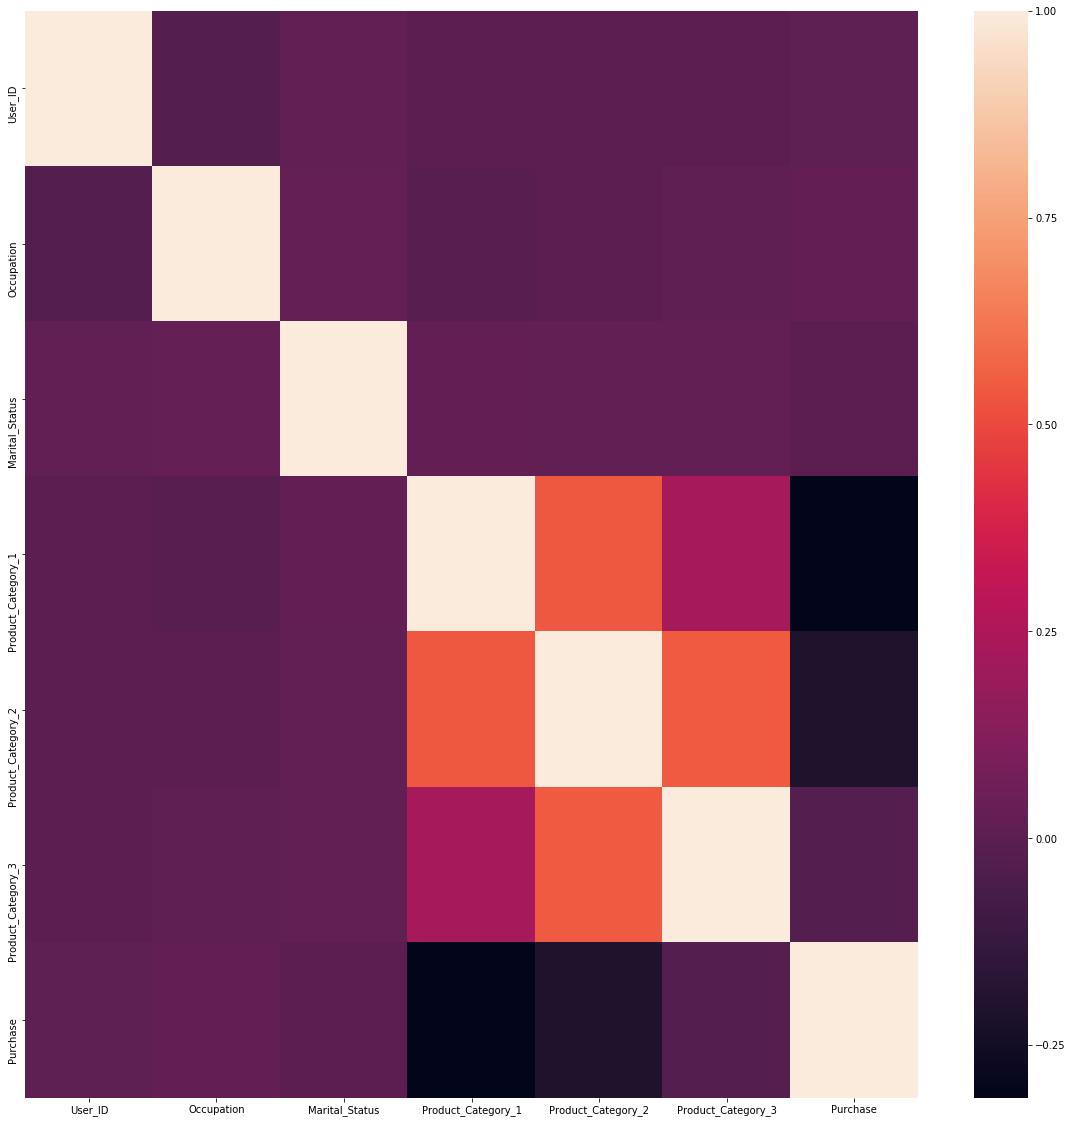

In [164]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

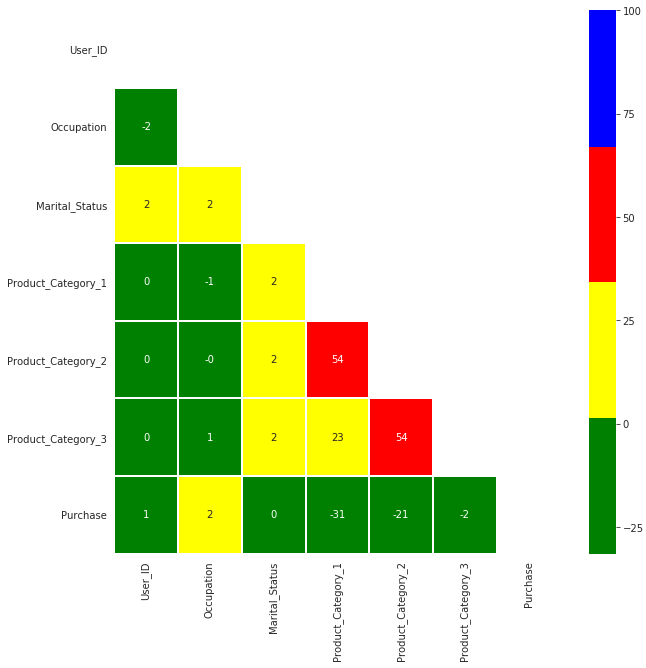

In [165]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

# Data Cleaning

In [166]:
# Dropping the duplicates (De-duplication)

In [167]:
df = df.drop_duplicates()
print( df.shape )

(537577, 12)


In [168]:
# It looks like we didn't have any duplicates in our original dataset. 
# Even so, it's a good idea to check this as an easy first step for cleaning your dataset

# Fix structural errors

In [169]:
# The basement feature has some nan values, to handle them:

In [170]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [173]:
df.Product_Category_1.mean()

5.295546498455105

Generating mean for all Product categories:

In [176]:
mean_cat1 = round(df.Product_Category_1.mean())
mean_cat2 = round(df.Product_Category_2.mean())
mean_cat3 = round(df.Product_Category_3.mean())

Replacing NaNs in all product categories with their means:

In [177]:
df.Product_Category_2.fillna(mean_cat1, inplace=True)
df.Product_Category_1.fillna(mean_cat2, inplace=True)
df.Product_Category_3.fillna(mean_cat3, inplace=True)

# Typos and capitalization

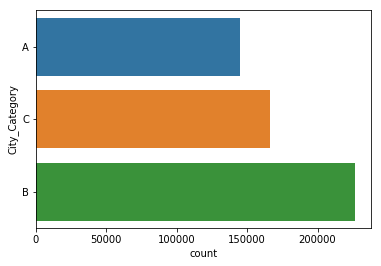

In [178]:
# Class distributions for 'roof'
sns.countplot(y='City_Category', data=df)

# Mislabeled classes

In [179]:
# Finally, we'll check for classes that are labeled as separate classes when they should really be the same.

# e.g. If 'N/A' and 'Not Applicable' appear as two separate classes, we should combine them.
# let's plot the class distributions for 'exterior_walls':

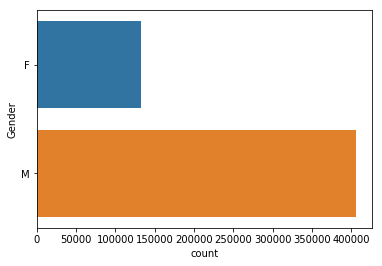

In [180]:
sns.countplot(y='Gender', data=df)

# Removing Outliers
Outliers can cause problems with certain types of models.
Boxplots are a nice way to detect outliers
Let's start with a box plot of your target variable, since that's what you're actually trying to predict

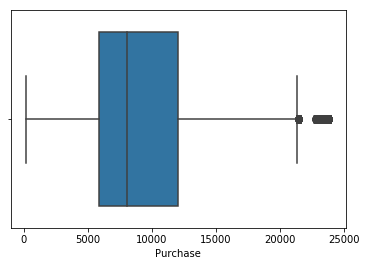

In [181]:
sns.boxplot(df.Purchase)

### Interpretation

The two vertical bars on the ends are the minimum and maximum values. The box in the middle is has data ranging from
25th percentile to 75th percentile. The vertical bar in the middle is the median. Half of all observations fall in the box.
Since there are some outliers to the end of the boxplot, they have to be removed from the data.

### Removing the outliers
Purchases of more than \\$21000 seem to have outliers.

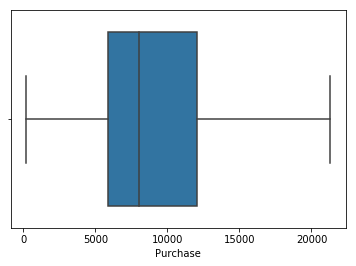

In [182]:
# setting the filter for Purchase to 21500, and decreasing from there
dg = df[df['Purchase']<21307]
# there is no out lier below 21307
sns.boxplot(dg.Purchase)

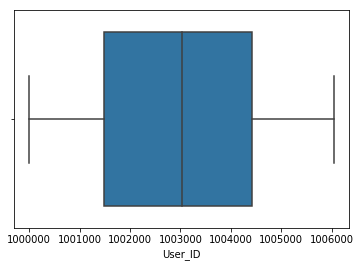

In [183]:
## Checking outliers in size of the house
sns.boxplot(dg.User_ID)

# Label missing categorical data

In [184]:
# Display number of missing values by categorical feature
dg.select_dtypes(include=['object']).isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

### Interpretation
No values in any of the categorical data seem to be misssing

# Flag and fill missing numeric data

In [185]:
# Display number of missing values by numeric feature
dg.select_dtypes(exclude=['object']).isnull().sum()

User_ID               0
Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
dtype: int64

### Observation
Well, it looks like we don't have any numerical features with missing values in this dataset.

# Before we move on to the next module, let's save the new dataframe we worked hard to clean.

In [186]:
# This makes sure we don't have to re-do all the cleaning after clossing the session

In [187]:
# Save cleaned dataframe to new file
dg.to_csv(r'cleaneddf.csv', index=False)

# Encode dummy variables (One Hot Encoding)

Machine learning algorithms cannot directly handle categorical features. Specifically, they cannot handle text values.
Therefore, we need to create dummy variables for our categorical features.
Dummy variables are a set of binary (0 or 1) features that each represent a single class from a categorical feature.

In [ ]:
dh = dg.drop(['User_ID'], axis = 1) #Remove an unimportant categorial column for machine learning

In [193]:
# Create a new dataframe with dummy variables for for our categorical features.
dh = pd.get_dummies(dh, columns=['Occupation', 'Marital_Status'])

In [195]:
# Save analytical base table
dh.to_csv(r'analyticaldf.csv', index=None)

# Machine Learning Models

# Data Preparation

In [196]:
dh = pd.read_csv("analyticaldf.csv")

In [198]:
dh.shape

(534777, 32)

# Train and Test Splits

Separate your dataframe into separate objects for the target variable (y) 
and the input features (X) and perform the train and test split

In [201]:
# Create separate object for target variable
y = dh.Purchase
# Create separate object for input features
X = dh.drop('Purchase', axis=1)

In [202]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Let's confirm we have the right number of observations in each subset

In [204]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(427821, 31) (106956, 31) (427821,) (106956,)


# Data standardization
In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1. hus we use mean and standard deviation of each feature. It is very important to save the mean and standard deviation for each of the feature from the training set, because we use the same mean and standard deviation in the test set.

In [ ]:
train_mean = X_train.mean()
train_std = X_train.std()

In [ ]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [ ]:
## Check for mean and std dev.
X_train.describe()

In [ ]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [ ]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

# Model 1 - Baseline Model
In this model, for every test data point, we will simply predict the average of the train labels as the output.
We will use this simple model to perform hypothesis testing for other complex models.

In [ ]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [ ]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()
from sklearn.metrics import r2_score

In [ ]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Model-2 Ridge Regression

In [ ]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
model.best_estimator_

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Feature Importance

In [ ]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=100)
model.fit(X_train, y_train)

In [ ]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

# Model-3 Support Vector Regression

In [ ]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 20 minutes

In [ ]:
model.best_estimator_

In [ ]:
## Building the model again with the best hyperparameters
model = SVR(C=100000, gamma=0.01)
model.fit(X_train, y_train)

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Model-4 Random Forest Regression
Reference for random search on random forest
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 15 minutes

In [ ]:
model.best_estimator_

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Feature Importance

In [ ]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=2)
model.fit(X_train, y_train)

In [ ]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

# Model-5 XGBoost Regression
Reference for random search on xgboost
https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d

In [ ]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
model.best_estimator_

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Feature Importance

In [ ]:
## Building the model again with the best hyperparameters
model = XGBRegressor(max_depth=2,learning_rate=0.05,n_estimators=400, reg_lambda=0.001)
model.fit(X_train, y_train)

In [ ]:
## Function to include figsize parameter
## Reference: https://stackoverflow.com/questions/40081888/xgboost-plot-importance-figure-size
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

In [ ]:
my_plot_importance(model, (10,10))

# Model-6 Lasso Regression

In [ ]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
model.best_estimator_

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Feature Importance

In [ ]:
## Building the model again with the best hyperparameters
model = Lasso(alpha=1000)
model.fit(X_train, y_train)

In [ ]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

# Model-7 Descision Tree Regression

In [ ]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
model.best_estimator_

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Model-8 KN Regression

In [ ]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

In [ ]:
model = KNeighborsRegressor(n_neighbors = optimal_k)
model.fit(X_train, y_train)

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Comparing all models and Saving the winning model to disk

In [ ]:
win_model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=2)
win_model.fit(X_train, y_train)
with open('rfr_real_estate.pkl', 'wb') as pickle_file:
       joblib.dump(win_model, 'rfr_real_estate.pkl')